# Floyd-Warshall
[Floyd’s](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm) algorithm is another method to find the shortest path in graph.

I have already implemented Dijkstra’s algorithm about two weeks ago. However, [Dijkstra](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm) doesn’t work on graphs with negative weights on edges.

Remember, we had a set of shortest paths found so far and any path extension would lead to a longer path. It is pretty easy to find a counter-example and break the algorithm if you have negative weights.

Floyd’s algorithm works even with negative weights. In advance, it is able to detect if there is a negative cycle in the graph. Note that graph with negative cycle containing vertices U, V has no shortest path between U, V.

![Floyd-Warshall](resource/day65-floyd_warshall.png)
black edge has weight=1, red edge has weight=-1

Which one is the shortest path between (0, 1)?
`length(0, 1) = -1`
`length(0, 1, 2, 0, 1) = -2`
`length(0, 1, 2, 0, 1, 2, 0, 1) = -3`

The idea of the algorithm is to iteratively build shortest paths between some vertices U and V using only limited set of vertices. When this set is extended by another vertex W, we can either get a shorter path through W or we have already had the best one.

`shortest(U, V) = min( shortest(U, V), shortest(U, W) + shortest(W, V) )`

You can see that the relationship is recursive. Iterative construction used in the algorithm is yet another showcase of dynamic programming technique.

In [1]:
from itertools import product
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline

## algorithm

In [2]:
def floyd(graph):
    # initialize matrix
    distance = nx.adjacency_matrix(graph).todense().astype(float)
    distance[distance == 0] = np.inf
    np.fill_diagonal(distance, 0)
    
    # find shortest paths
    for k, i, j in product(range(len(graph)), repeat=3):
        distance[i, j] = min(distance[i, j], distance[i, k] + distance[k, j])
        
        # negative cycle detection
        if i == j and distance[i, j] < 0:
            return k, i, 'negative cycle detected'

    # shortest paths
    return {
        (i, j): distance[i, j]
        for i, j in product(range(len(graph)), repeat=2)
        if i != j and not np.isinf(distance[i, j])
    }

## graph

In [3]:
def generate_graph(n, edge_prob=.5, pos_weight_prob=.2):
    graph = nx.DiGraph()
    graph.add_nodes_from(range(n))
    
    for u, v in product(range(n), repeat=2):
        if u != v and np.random.rand() < edge_prob:
            weight = [-1, 1][np.random.rand() < pos_weight_prob]
            graph.add_edge(u, v, weight=weight)
            
    return graph

In [4]:
def draw_graph(graph):
    cm = {-1: 'red', 1: 'black'}
    colors = [cm[e['weight']]  for (u, v, e) in graph.edges(data=True)]

    plt.figure(figsize=(8, 8))
    plt.axis('off')

    layout = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph, layout, node_color='steelblue', node_size=520)
    nx.draw_networkx_edges(graph, layout, edge_color=colors)
    nx.draw_networkx_labels(graph, layout, font_color='white')

## run

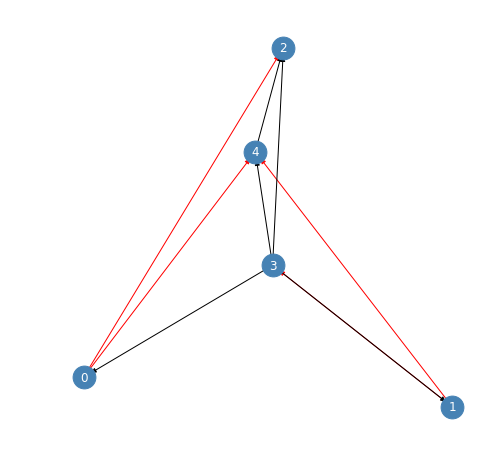

In [5]:
graph = generate_graph(5, edge_prob=.4, pos_weight_prob=.7)
draw_graph(graph)

In [6]:
floyd(graph)

{(0, 2): -1.0,
 (0, 4): -1.0,
 (1, 0): 0.0,
 (1, 2): -1.0,
 (1, 3): -1.0,
 (1, 4): -1.0,
 (3, 0): 1.0,
 (3, 1): 1.0,
 (3, 2): 0.0,
 (3, 4): 0.0,
 (4, 2): 1.0}

## run

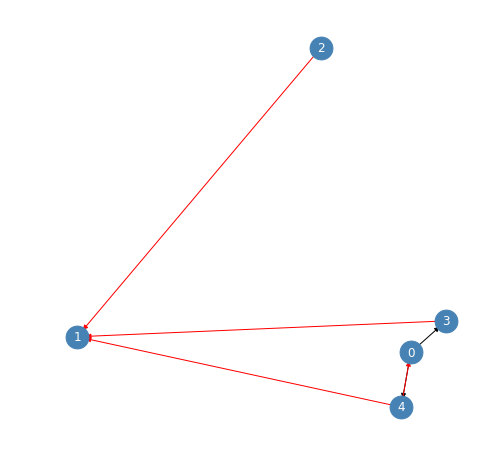

In [7]:
graph = generate_graph(5, edge_prob=.4, pos_weight_prob=.6)
draw_graph(graph)

In [8]:
floyd(graph)

{(0, 1): 0.0,
 (0, 3): 1.0,
 (0, 4): 1.0,
 (2, 1): -1.0,
 (3, 1): -1.0,
 (4, 0): -1.0,
 (4, 1): -1.0,
 (4, 3): 0.0}